In [1]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(microViz)
library("ggpubr")

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
microViz version 0.12.7 - Copyright (C) 2021-2025 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For cita

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11,
12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) %>% 
mutate(
  Genotype = Genotype %>%
    str_replace_all("Kelsey-1", "Kelsey1") %>%
    str_replace_all("Cooper-9", "Cooper9")
)

meta$Genotype<-factor(meta$Genotype, 
                              levels=c("FM19", "FM6", "FM9", "U44",
                                       "FM14", "Elkhorn","K2",
                                      "Acerv2", "Kelsey1", "Cooper9"))


In [4]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [5]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


ps=subset_taxa(ps, Phylum!="NA")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [6]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

select =c("Ambient_Placebo", "NH4_Pathogen")
#only nutrient and placebo
ps_placebo_un =subset_samples(ps_paired, Combo %in% select)
ps_placebo_un

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [7]:
ps_placebo_un_fill = filter_taxa(ps_placebo_un, function(x) sum(x > 5) > (0.05*length(x)), TRUE) %>% tax_fix()
ps_placebo_un_fill
                           
                                                                                    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 336 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 336 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 336 tips and 286 internal nodes ]

In [8]:
sample_data(ps_placebo_un_fill) %>%
  group_by(Combo, Health) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the
`.groups` argument.


Combo,Health,Paired
<chr>,<chr>,<int>
Ambient_Placebo,AH,36
NH4_Pathogen,AH,2
NH4_Pathogen,DL,30


In [9]:
colnames(meta)

[1] "sample_names"               "featurecounts"             
 [3] "Initial_sample_ID"          "Tag"                       
 [5] "start_date"                 "event_date"                
 [7] "Date_Collected"             "Date"                      
 [9] "TimePoint"                  "Replicate"                 
[11] "Genotype"                   "Nursery"                   
[13] "Nutrients"                  "Diseased"                  
[15] "Combo"                      "Tank_N"                    
[17] "Tank_D1"                    "Tank_D2"                   
[19] "Type"                       "Health"                    
[21] "Outcome"                    "Notes"                     
[23] "Severity"                   "Survivorship"              
[25] "Pairs"                      "Combo_health"              
[27] "Archive_box"                "Genotype.1"                
[29] "NH4_Susceptibility"         "Disease_Susceptibility"    
[31] "NH4_Disease_Susceptibility" "Expected"                  
[33] "Surv_disease"               "Surv_nutrients"            
[35] "surv"                       "std.err"                   
[37] "barcode_label"              "barcode_seq"               
[39] "ID"                         "Sequencing_Round"          
[41] "Plate_Name"                 "Plate_Barcode"             
[43] "Well_Position"              "Sequence_Name"             
[45] "Illumina5_Adapter"          "Forward_Primer_Pad"        
[47] "Golay_Barcode"              "X515FB_Forward_Primer"     
[49] "Primer_For_PCR"             "X"                         
[51] "estimate"                   "error"                     
[53] "lower"                      "upper"                     
[55] "name"                       "model"                     
[57] "Simpson"                    "Shannon"

In [10]:
set.seed(123)
output = ancombc2(data = ps_placebo_un_fill , tax_level = "ASVs",
                  fix_formula = "Combo", 
                  #rand_formula = "(1| Genotype)",
                  p_adj_method = "holm",  pairwise = TRUE,
                  group = "Combo",struc_zero = TRUE, alpha = 0.001,
                  dunnet = TRUE,
                  n_cl=4, prv_cut = 0, lib_cut = 1000
                  #lme_control = lme4::lmerControl()
                 )
        

Checking the input data type ...

The input data is of type: phyloseq

PASS

Checking the sample metadata ...

The specified variables in the formula: Combo

The available variables in the sample metadata: sample_names, featurecounts, Initial_sample_ID, Tag, start_date, event_date, Date_Collected, Date, TimePoint, Replicate, Genotype, Nursery, Nutrients, Diseased, Combo, Tank_N, Tank_D1, Tank_D2, Type, Health, Outcome, Notes, Severity, Survivorship, Pairs, Combo_health, Archive_box, Genotype.1, NH4_Susceptibility, Disease_Susceptibility, NH4_Disease_Susceptibility, Expected, Surv_disease, Surv_nutrients, surv, std.err, barcode_label, barcode_seq, ID, Sequencing_Round, Plate_Name, Plate_Barcode, Well_Position, Sequence_Name, Illumina5_Adapter, Forward_Primer_Pad, Golay_Barcode, X515FB_Forward_Primer, Primer_For_PCR, X, estimate, error, lower, upper, name, model, Simpson, Shannon

PASS

Checking other arguments ...

The number of groups of interest is: 2

Warning message:
“The group vari

In [11]:
res=output$res
head(res)

dim(res)

taxa_df = tax_table(ps_placebo_un_fill) %>% as.data.frame() %>% rownames_to_column("taxon")
head(taxa_df)

df_fig = res %>% left_join(taxa_df, by = "taxon")
dim(df_fig)
head(df_fig)

,taxon,lfc_(Intercept),lfc_ComboNH4_Pathogen,se_(Intercept),se_ComboNH4_Pathogen,W_(Intercept),W_ComboNH4_Pathogen,p_(Intercept),p_ComboNH4_Pathogen,q_(Intercept),q_ComboNH4_Pathogen,diff_(Intercept),diff_ComboNH4_Pathogen,passed_ss_(Intercept),passed_ss_ComboNH4_Pathogen
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,3e25ffb24420d1120183e84047dd818e,0.14492055,-0.23052779,0.009486034,0.1491937,15.27725,-1.5451580,1.070695e-04,0.197198091,0.0183088760,1,FALSE,FALSE,FALSE,TRUE
2,d1525c3fa5ef9858663670393a6771a1,-0.16732045,0.01456321,NaN,0.1432160,NaN,0.1016871,1.000000e+00,0.928281536,1.0000000000,1,FALSE,FALSE,TRUE,TRUE
3,cc47dbf08e19583b226ca7aef0fdfe88,-0.01102081,-0.11429462,NaN,0.1461661,NaN,-0.7819500,1.000000e+00,0.516119087,1.0000000000,1,FALSE,FALSE,TRUE,TRUE
4,b38e455ff5afd35267d8f10060d463c6,0.63116235,-0.88017969,0.007251825,0.1481411,87.03496,-5.9414965,3.343360e-06,0.009531839,0.0006185216,1,TRUE,FALSE,FALSE,TRUE
5,823c79a88cd4499479ebccd160c1d38b,0.21238372,-0.23181443,0.013158937,0.1454126,16.13988,-1.5941839,8.620173e-05,0.186120083,0.0148266981,1,FALSE,FALSE,FALSE,TRUE
6,45c2801a95489b86b77c243a8d86132b,-0.28147984,0.33466020,NaN,0.1421273,NaN,2.3546517,1.000000e+00,0.142735645,1.0000000000,1,FALSE,FALSE,TRUE,TRUE


[1] 226  15

,taxon,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3e25ffb24420d1120183e84047dd818e,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Kordiimonadales,f__uncultured,g__uncultured,s__uncultured_Kordiimonas,ASV_2500
2,d1525c3fa5ef9858663670393a6771a1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Algimonas,s__uncultured_bacterium,ASV_8305
3,cc47dbf08e19583b226ca7aef0fdfe88,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_8105
4,7c45633a6aab4c6c56f1b9f5e6e604c3,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_4974
5,b38e455ff5afd35267d8f10060d463c6,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_7098
6,823c79a88cd4499479ebccd160c1d38b,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_5181


[1] 226  23

,taxon,lfc_(Intercept),lfc_ComboNH4_Pathogen,se_(Intercept),se_ComboNH4_Pathogen,W_(Intercept),W_ComboNH4_Pathogen,p_(Intercept),p_ComboNH4_Pathogen,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_ComboNH4_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3e25ffb24420d1120183e84047dd818e,0.14492055,-0.23052779,0.009486034,0.1491937,15.27725,-1.5451580,1.070695e-04,0.197198091,0.0183088760,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Kordiimonadales,f__uncultured,g__uncultured,s__uncultured_Kordiimonas,ASV_2500
2,d1525c3fa5ef9858663670393a6771a1,-0.16732045,0.01456321,NaN,0.1432160,NaN,0.1016871,1.000000e+00,0.928281536,1.0000000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Algimonas,s__uncultured_bacterium,ASV_8305
3,cc47dbf08e19583b226ca7aef0fdfe88,-0.01102081,-0.11429462,NaN,0.1461661,NaN,-0.7819500,1.000000e+00,0.516119087,1.0000000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_8105
4,b38e455ff5afd35267d8f10060d463c6,0.63116235,-0.88017969,0.007251825,0.1481411,87.03496,-5.9414965,3.343360e-06,0.009531839,0.0006185216,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_7098
5,823c79a88cd4499479ebccd160c1d38b,0.21238372,-0.23181443,0.013158937,0.1454126,16.13988,-1.5941839,8.620173e-05,0.186120083,0.0148266981,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_5181
6,45c2801a95489b86b77c243a8d86132b,-0.28147984,0.33466020,NaN,0.1421273,NaN,2.3546517,1.000000e+00,0.142735645,1.0000000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_2815


In [12]:
taxa_df = tax_table(ps_placebo_un_fill) %>% as.data.frame() %>% rownames_to_column("taxon")
head(taxa_df)

,taxon,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3e25ffb24420d1120183e84047dd818e,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Kordiimonadales,f__uncultured,g__uncultured,s__uncultured_Kordiimonas,ASV_2500
2,d1525c3fa5ef9858663670393a6771a1,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Algimonas,s__uncultured_bacterium,ASV_8305
3,cc47dbf08e19583b226ca7aef0fdfe88,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_8105
4,7c45633a6aab4c6c56f1b9f5e6e604c3,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_4974
5,b38e455ff5afd35267d8f10060d463c6,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_7098
6,823c79a88cd4499479ebccd160c1d38b,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_5181


In [13]:
df_fig = res %>% left_join(taxa_df, by = "taxon") %>%
filter(lfc_ComboNH4_Pathogen < -1 | lfc_ComboNH4_Pathogen > 1)  %>%
filter(passed_ss_ComboNH4_Pathogen == "TRUE") 
dim(df_fig)
head(df_fig)

[1] 22 23

,taxon,lfc_(Intercept),lfc_ComboNH4_Pathogen,se_(Intercept),se_ComboNH4_Pathogen,W_(Intercept),W_ComboNH4_Pathogen,p_(Intercept),p_ComboNH4_Pathogen,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_ComboNH4_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2b6d08f26def800720c669720ed0d5bf,0.6857600,-1.274041,0.020122616,0.1478562,34.07907,-8.616757,5.554732e-05,0.003286798,9.609687e-03,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingorhabdus,g__Sphingorhabdus Genus,ASV_1730
2,0bd4e57d1dd2796a391137f28c3ab2aa,1.4595277,-2.076469,NaN,0.1420040,NaN,-14.622609,1.000000e+00,0.004644261,1.000000e+00,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Stappiaceae,f__Stappiaceae Family,f__Stappiaceae Family,ASV_481
3,5973ce18fde2c5a2bc4dd24babd97712,1.4305755,-1.971996,NaN,0.1583241,NaN,-12.455440,1.000000e+00,0.006384213,1.000000e+00,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Kiloniellales,f__Kiloniellaceae,g__Kiloniella,s__Kiloniella_litopenaei,ASV_3601
4,b000391e3cac581321af6ff4e0b9dd5e,0.7634954,-1.147074,NaN,0.1498257,NaN,-7.656051,1.000000e+00,0.016635909,1.000000e+00,⋯,TRUE,TRUE,d__Bacteria,p__Acidobacteriota,c__Holophagae,o__Acanthopleuribacterales,f__Acanthopleuribacteraceae,g__Acanthopleuribacter,s__Acanthopleuribacter_pedis,ASV_6956
5,1b61f6b286fab0fc543cd00207e1ff28,0.7696718,-1.216706,0.012559414,0.1547886,61.28246,-7.860431,4.246547e-07,0.001415470,8.535559e-05,⋯,FALSE,TRUE,d__Bacteria,p__Myxococcota,c__Myxococcia,o__Myxococcales,f__Myxococcaceae,g__P3OB-42,s__uncultured_bacterium,ASV_1099
6,0e6e0aedfc60946864984252e8336032,-0.6499310,1.510369,0.008572481,0.1491074,-75.81597,10.129404,1.739263e-04,0.009605926,2.921962e-02,⋯,FALSE,TRUE,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Chitinophagales,f__Saprospiraceae,g__uncultured,g__uncultured Genus,ASV_580


In [14]:
write_csv(df_fig, "/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_Nutri_disease.csv")

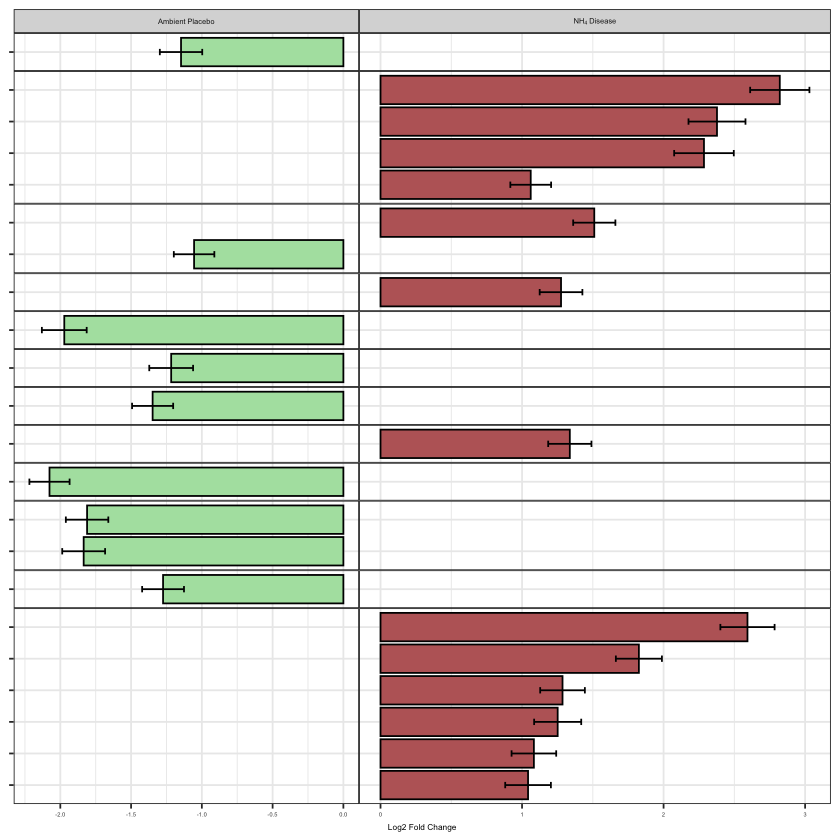

In [15]:


combo_labs <- as_labeller(c("NH4" = "NH[4]~Disease",
                          "Ambient" = "Ambient~Placebo"), default = label_parsed)


F1 <- df_fig %>%
 filter(passed_ss_ComboNH4_Pathogen == "TRUE") %>%
  mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "") %>%
 
  mutate(
    direction = ifelse(lfc_ComboNH4_Pathogen > 0, "NH4", "Ambient"),
    direction = factor(direction, levels = c("Ambient", "NH4"))
  ) %>%
  ggplot(aes(x = reorder(ASVs, lfc_ComboNH4_Pathogen), y = lfc_ComboNH4_Pathogen, fill = direction)) +
  geom_bar(stat = "identity", color = "black") +
  geom_errorbar(aes(ymin = lfc_ComboNH4_Pathogen - se_ComboNH4_Pathogen, 
                    ymax = lfc_ComboNH4_Pathogen + se_ComboNH4_Pathogen), width = 0.2) +
  coord_flip() +
  labs(
    x = "ASVs",
    y = "Log2 Fold Change",
    fill = "Direction"
  ) +
  scale_fill_manual(values = c("NH4" = "#bc6767", "Ambient" = "#AFE1AF")) +
  facet_grid(Order ~
             direction, 
             space = "free", scales = "free",
             switch = "y",  labeller = labeller(direction = combo_labs)) +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_blank(),
    axis.text.x = element_text(size = 3.5),
    axis.text.y = element_blank(),
    strip.text.x = element_text(size = 4.5),
    strip.text.y = element_blank(),
    #  strip.text.y = element_text(size=5),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    legend.position = "none",
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  ) 
#theme(axis.text.x = element_text(angle = 60, hjust = 1)) 
F1

In [16]:
psr_fill_melt = ps_placebo_un_fill  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()   


taxa_fil= df_fig %>% column_to_rownames("taxon")%>%
as.matrix


ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(taxa_fil))
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                     Pairs=="paired" & Combo %in% select )
#ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
#ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()  


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 22 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 22 taxa by 22 taxonomic ranks ]

In [17]:
head(psr_fill_melt)

,OTU,Sample,Abundance,sample_names,featurecounts,Initial_sample_ID,Tag,start_date,event_date,Date_Collected,⋯,passed_ss_.Intercept.,passed_ss_ComboNH4_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
110,0e6e0aedfc60946864984252e8336032,N200-A062,1,N200-A062,35489,200,A062,2020-08-19,2020-11-10,10-Nov-20,⋯,FALSE,TRUE,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Chitinophagales,f__Saprospiraceae,g__uncultured,g__uncultured Genus,ASV_580
156,1b61f6b286fab0fc543cd00207e1ff28,N85-A055,1,N85-A055,31470,85,A055,2020-08-19,2020-11-03,3-Nov-20,⋯,FALSE,TRUE,d__Bacteria,p__Myxococcota,c__Myxococcia,o__Myxococcales,f__Myxococcaceae,g__P3OB-42,s__uncultured_bacterium,ASV_1099
168,1b61f6b286fab0fc543cd00207e1ff28,N199-A055,1,N199-A055,24762,199,A055,2020-08-19,2020-11-10,10-Nov-20,⋯,FALSE,TRUE,d__Bacteria,p__Myxococcota,c__Myxococcia,o__Myxococcales,f__Myxococcaceae,g__P3OB-42,s__uncultured_bacterium,ASV_1099
293,3790ac5be14bbbdc8719ce6632dcb64b,N182-A069,1,N182-A069,32430,182,A069,2020-08-19,2020-11-08,8-Nov-20,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,g__Vibrio Genus,ASV_2224
422,4ca08cf028bb6992f998bf37f206c01d,N141-A103,1,N141-A103,23261,141,A103,2020-08-19,2020-11-06,6-Nov-20,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,g__Thalassotalea Genus,ASV_3091
459,4ca08cf028bb6992f998bf37f206c01d,N197-A033,1,N197-A033,30218,197,A033,2020-08-19,2020-11-10,10-Nov-20,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,g__Thalassotalea Genus,ASV_3091



Ambient     NH4 
     39     166 


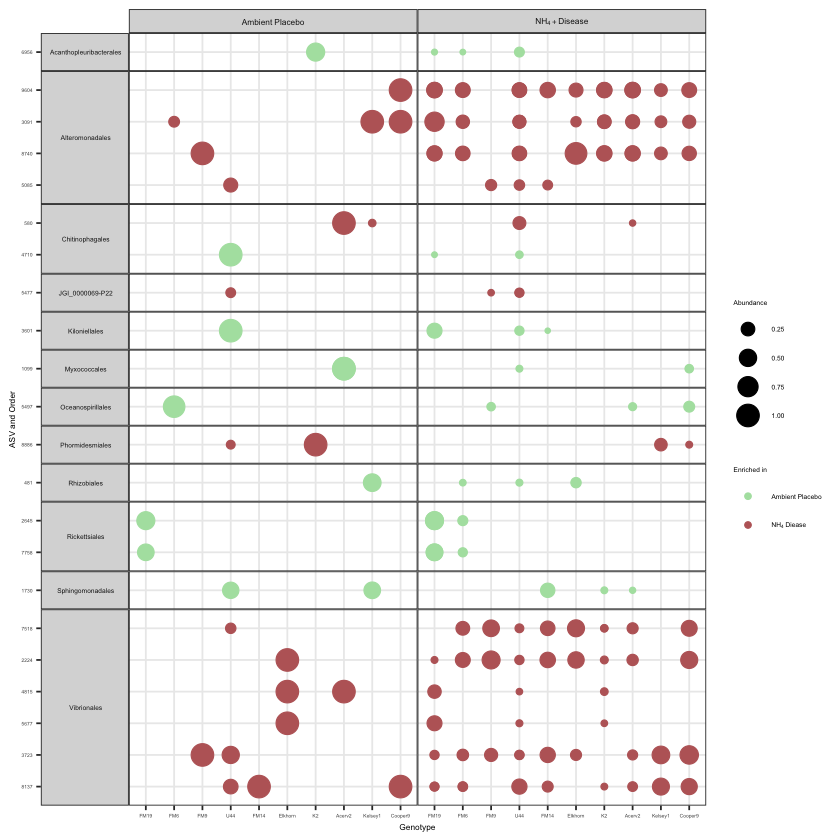

In [18]:

library(stringr)
psr_fill_melt <- psr_fill_melt %>%
  mutate(Combo = factor(Combo, levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen")))
# Define labellers
combo_labs <- as_labeller(c(
  "Ambient_Placebo" = "Ambient~Placebo",
  "Ambient_Pathogen" = "Ambient~Disease",
  "NH4_Placebo" = "NH[4]~Placebo",
  "NH4_Pathogen" = "NH[4]+Disease"
), default = label_parsed)


lab1 <- c(expression(Ambient~Placebo),
          
          expression(NH[4]~Diease))
# Plot
F2 <- psr_fill_melt %>%
  as.data.frame() %>%
  mutate(
    Abundance = as.numeric(as.character(Abundance)),
    lfc_ComboNH4_Pathogen = as.numeric(str_trim(as.character(lfc_ComboNH4_Pathogen)))
  ) %>%
  filter(
    passed_ss_ComboNH4_Pathogen == "TRUE",
    Abundance > 0,
    !is.na(Severity)
  ) %>%
  mutate(
    Enriched  = ifelse(lfc_ComboNH4_Pathogen > 0, "NH4", "Ambient")
  ) %>%
  { print(table(.$Enriched)); . } %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "o__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "ASV_", ""))) %>%

  ggplot(aes(x = Genotype, y = reorder(ASVs, lfc_ComboNH4_Pathogen))) +
  geom_point(aes(size = Abundance, color = Enriched)) +
  scale_color_manual("Enriched in", values = c("#AFE1AF", "#bc6767"),labels=lab1) +
  facet_grid(
    Order ~ Combo,
    space = "free",
    scales = "free",
    switch = "y",
      labeller = labeller(Combo = combo_labs
    )
  ) +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.x = element_text(size = 3),
    axis.text.y = element_text(size = 3),
    strip.text.y = element_text(size = 4),
    strip.text.y.left = element_text(angle = 0),
    strip.text.x = element_text(size = 5),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4),
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  ) +
#theme(axis.text.x = element_text(angle = 20, hjust = 1)) +
#guides(fill = guide_legend(keywidth = 0.30, , keyheight =.60, ncol=1)) +
  ylab("ASV and Order")
F2

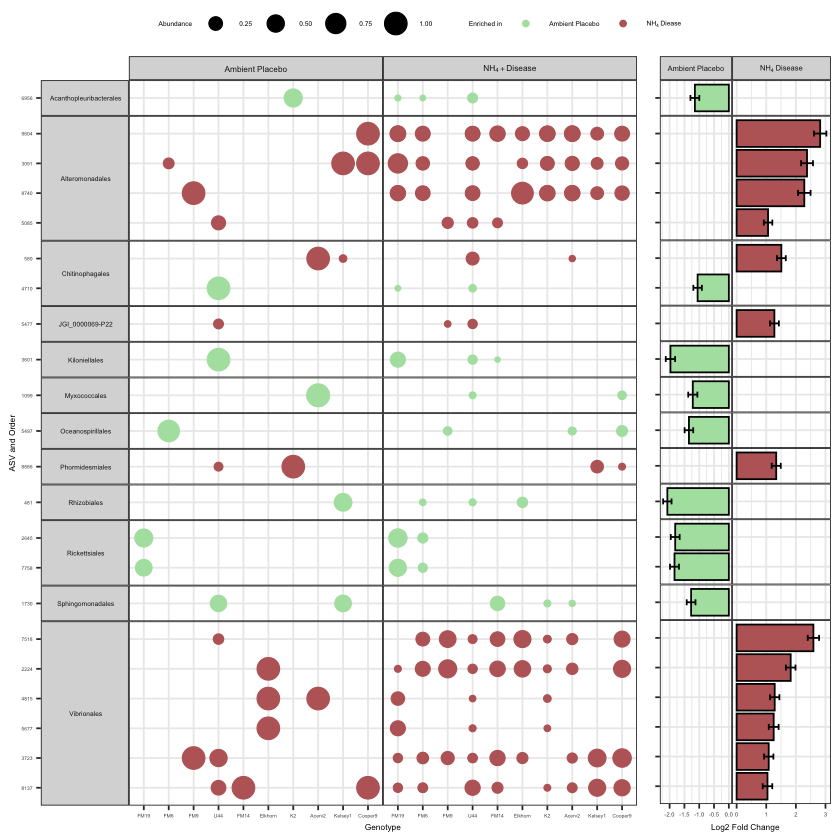

In [19]:
 ggpubr::ggarrange(F2, F1, common.legend = TRUE, legend = "top",
                   widths=c(2,0.6))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/new_ANCOM_nutrDisease.jpg", 
      width = 6, height = 5, units = "in", dpi=300)

In [169]:
library(ComplexUpset)
library(tidyverse)

# Load data
disease <- read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_disease.csv") %>%
mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "") %>%
filter(lfc_ComboAmbient_Pathogen > 0) 
dim(disease)
nutri <- read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_nutrients.csv") %>%
mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "") %>% 
filter(lfc_ComboNH4_Placebo > 0) 
dim(nutri)
nutri_disease <- read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_Nutri_disease.csv") %>% 
filter(lfc_ComboNH4_Pathogen > 0)  %>%
mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "")
dim(nutri_disease)

# Create presence/absence columns for each set
join_data <- full_join(disease %>% select(ASVs) %>% mutate(Disease = TRUE),
                        nutri %>% select(ASVs) %>% mutate(Nutri = TRUE),
                        by = "ASVs") %>%
              full_join(nutri_disease %>% select(ASVs) %>% mutate(Nutri_Disease = TRUE),
                        by = "ASVs") 



[1] 29 23

[1] 10 23

[1] 13 23

In [178]:
upset_data <- join_data %>%
  left_join(disease %>% select(ASVs, Order) %>% rename(Order_disease = Order), by = "ASVs") %>%
  left_join(nutri %>% select(ASVs, Order) %>% rename(Order_nutri = Order), by = "ASVs") %>%
  left_join(nutri_disease %>% select(ASVs, Order) %>% rename(Order_nutri_disease = Order), by = "ASVs") %>%
  mutate(Order = coalesce(Order_disease, Order_nutri, Order_nutri_disease)) %>%
  select(-Order_disease, -Order_nutri, -Order_nutri_disease) %>% rename(
    `Ambient+Disease` = Disease,
    `Ammonia+Placebo` = Nutri,
    `Ammonia+Disease` = Nutri_Disease
  ) 
head(upset_data)

,ASVs,Ambient+Disease,Ammonia+Placebo,Ammonia+Disease,Order
,<chr>,<lgl>,<lgl>,<lgl>,<chr>
1,ASV_8416,TRUE,NA,NA,Alteromonadales
2,ASV_1718,TRUE,NA,NA,Flavobacteriales
3,ASV_3723,TRUE,NA,TRUE,Vibrionales
4,ASV_7329,TRUE,NA,NA,Alteromonadales
5,ASV_8131,TRUE,NA,NA,Alteromonadales
6,ASV_6965,TRUE,NA,NA,Chitinophagales


Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Detected missing values in the columns indicating sets, coercing to FALSE”


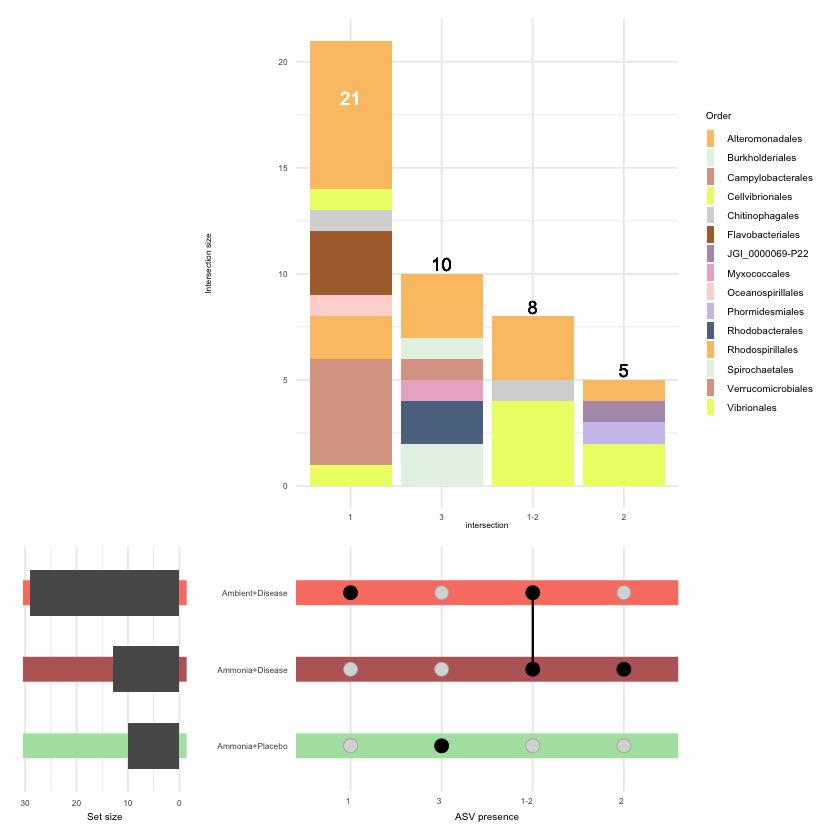

In [179]:
library(ComplexUpset)
library(ggplot2)

library(ComplexUpset)
library(ggplot2)

upset(
  upset_data,
  intersect = c("Ambient+Disease", "Ammonia+Placebo", "Ammonia+Disease"),
  name = "ASV presence",

  base_annotations = list(
    'Intersection size' = intersection_size(
      aes(fill = Order)  
    ) +
    scale_fill_manual(values = c("#fac472", "#e5f2e5", "#dba494", "#ecfa72",
                                 "#d6d6d6", "#AD6F3B", "#b39bb7", "#ecb2cd", "#fdd8d4", "#cec3ee", "#5E738F",
                                 "#fac472", "#e5f2e5", "#dba494", "#ecfa72",
                                 "#d6d6d6", "#AD6F3B", "#b39bb7", "#ecb2cd", "#fdd8d4")) +
    theme(
      axis.title.x = element_text(size = 5),
      axis.title.y = element_text(size = 5),
      axis.text.x = element_text(size = 5),
      axis.text.y = element_text(size = 5),
        legend.text = element_text(size = 6),
    legend.title = element_text(size = 6)
    ) +
      guides(fill = guide_legend(keywidth = 0.40, , keyheight =.80, ncol=1))
  ),
  set_sizes = upset_set_size(),
  stripes = c("#AFE1AF", '#bc6767', 'salmon'),
 themes = upset_modify_themes(
    list(
      'intersections_matrix' = theme(
          axis.text.y = element_text(size = 5),
        axis.text.x = element_text(size = 5, hjust = 1),
          axis.title.x = element_text(size = 6)# ← smaller x-axis labels for ASV presence matrix
      ),
      'overall_sizes' = theme(
        axis.text.x = element_text(size = 5),
          axis.title.x = element_text(size = 6)# ← if you also want to affect set size x-axis
      )
    )
  )
) 
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/upset.jpg", 
      width = 5, height = 4, units = "in", dpi=300)

In [29]:
library("VennDiagram")

Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    rotate




In [36]:
dis_list= disease_pos%>% select(taxon) %>%pull()
nutri_disease_list = nutri_disease_pos %>% select(taxon) %>%pull()
nutri_list = nutri %>% select(taxon) %>%pull()

In [71]:
dis_list =c(
  "d3fadb4f0d386689bcb6b02104717b88",
  "2b14e18f7c70850511f279b8aa970d44",
  "5cf3ca8696f1c1d798cd212e989815fd",
  "b90543203fdc90c58a181755d5524f60",
  "cd023bb01a5064b37c284c33eaed74c4",
  "b03c8f69dcacb564a0a136c9333fd1c3",
  "3790ac5be14bbbdc8719ce6632dcb64b",
  "208cb957021df2a72767dda21a24081a",
  "cd1c36a7f04147fce84ecdb93d5ef05c",
  "7375506e59ae807e02b13e9a9efebeaa",
  "6fb8dc9b1d8d6a80f9a51521eed328b8",
  "a715a49505b6d92a11276e2b06b498ee",
  "a9753fb873feede8ae92d70ae31a7d8f",
  "fe219e79cd200396e5268aaf72eaa6ec",
  "67e77e116dd43c2dadd4eb3d0ce1ed73",
  "fa366be7606b9579ca1726d958c74e04",
  "0699e4f1e49fc5814c27a75ce46f7c72",
  "4ca08cf028bb6992f998bf37f206c01d",
  "dcb7ebb3749df706e8921afcf88d7f93",
  "46f3b8bd39ad98e3a511ccd4d594ffc9",
  "98a4dadb7e2a3461a926f4fcb68f44a8",
  "14dd0d3f3e96b911d669645620961212",
  "26a2c67d3871c75aaa4f85d4e1ee6f07",
  "35ded7bfcbb8e3a80e06696b551b0b97",
  "7faad2d299566d181c7c321533a13692",
  "f242850c598d509ac98aea5999f2779f",
  "0e6e0aedfc60946864984252e8336032",
  "bdde774a10999030a546da2fc970edd1",
  "630acb99a0274a90bb89878de731dd96"
)

nutri_disease_list <- c(
  "cd1c36a7f04147fce84ecdb93d5ef05c",
  "7f6ef278b2ed67a33d9a76b1fbc3dd0e",
  "5cf3ca8696f1c1d798cd212e989815fd",
  "8e0972955984f6a410d0142e19d86c44",
  "891e3e85afb18d773b7357c3d01ac16f",
  "7837f978a58cb5f4395384468ba4088a",
  "e002512f5f00a0541aec918b18cf04c5",
  "0e6e0aedfc60946864984252e8336032",
  "3790ac5be14bbbdc8719ce6632dcb64b",
  "dcb7ebb3749df706e8921afcf88d7f93",
  "4ca08cf028bb6992f998bf37f206c01d",
  "bdde774a10999030a546da2fc970edd1",
  "f242850c598d509ac98aea5999f2779f"
)


nutri_list= c("7ec46cc62d30097b3d75a74935cb197b",
  "caa981194050ca47e53f144a79dd1bc6",
  "b263bdbc83e8a198096791aba4f5813f",
  "27dbb0e4b4920b6681df8a9e99c241b5",
  "afcbce2b79a5eeb39c927f55fe82df44",
  "8661e70ea7961916579bcbd26617f7ea",
  "f56e3acdf67fe8c0c4a0fd18cf1053f8",
  "46770fda10806444cca198c487dd1c64",
  "f8c893ef63708afacf2326c120677ada",
  "128b9e56c2fa2a8cd24c5e260d0f8335")





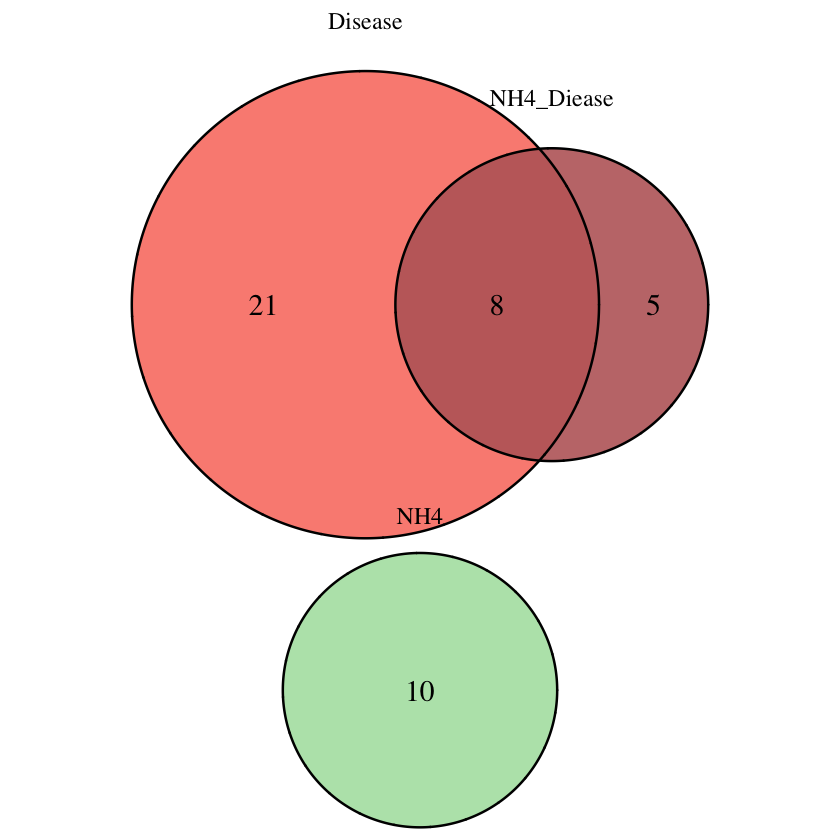

In [72]:
# Pull the actual vectors
#dis_list <- disease_pos %>% select(taxon) %>% pull()
#nutri_disease_list <- nutri_disease_pos %>% select(taxon) %>% pull()
#nutri_list <- nutri %>% select(taxon) %>% pull()

# Create Venn diagram using the actual data
venn.plot <- venn.diagram(
  x = list(
    Disease = dis_list,
    NH4_Diease  = nutri_disease_list,
    NH4 = nutri_list
  ),
  filename = NULL,
  fill = c('salmon','#bc6767',  "#AFE1AF"),
  alpha = 0.9,
  cex = 1.5,
  cat.cex = 1.2,
  cat.pos = 0
)

# Draw it
grid.newpage()
grid.draw(venn.plot)

In [70]:
intersect(dis_list, nutri_list)

character(0)

In [25]:
sessionInfo()

R version 4.5.0 (2025-04-11)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ComplexUpset_1.3.3 ggpubr_0.6.0       microViz_0.12.7    lubridate_1.9.4   
 [5] forcats_1.0.0      stringr_1.5.1      dplyr_1.1.4        purrr_1.0.4       
 [9] readr_2.1.5        tidyverse_2.0.0    microbiome_1.30.0  phyloseq_1.52.0   
[13] ggplot2_3.5.2      tibble_3.2.1       tidyr_1.3.1        qiime2R_0.99.6    
[17] ANCOMBC_2.10.0    

loaded via a namespace (and not attached):
  [1] splines_4.5.0         